In [9]:
#import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Example cell voltages in a battery pack
cells = np.array([4.1, 3.8, 3.5, 4.0])

# Calculate max, min, and imbalance
max_v = np.max(cells)
min_v = np.min(cells)
delta = max_v - min_v

print(f"Pack Voltages: {cells}")
print(f"Max Imbalance: {delta:.3f} V")

# Check if imbalance exceeds threshold
if delta > 0.5:
    print("STATUS: BALANCE REQUIRED")
else:
    print("STATUS: HEALTHY")

Pack Voltages: [4.1 3.8 3.5 4. ]
Max Imbalance: 0.600 V
STATUS: BALANCE REQUIRED


In [11]:
#simulate active balancing process

#define balancing parameters
balancing_effiiciency = 0.9
charge_packet = 0.01

#simulate balancing process
sim_cells = cells.copy()
steps = 0
history = [sim_cells.copy()]            #to track voltage changes over time

while np.max(sim_cells) - np.min(sim_cells) > 0.01:
    source_idx = np.argmax(sim_cells)
    target_idx = np.argmin(sim_cells)

    sim_cells[source_idx] -= charge_packet
    sim_cells[target_idx] += charge_packet * balancing_effiiciency

    history.append(sim_cells.copy())
    steps += 1

print(f"Balancing completed in {steps} steps.")
print(f"Final Voltages: {sim_cells}")

Balancing completed in 42 steps.
Final Voltages: [3.84  3.836 3.842 3.84 ]


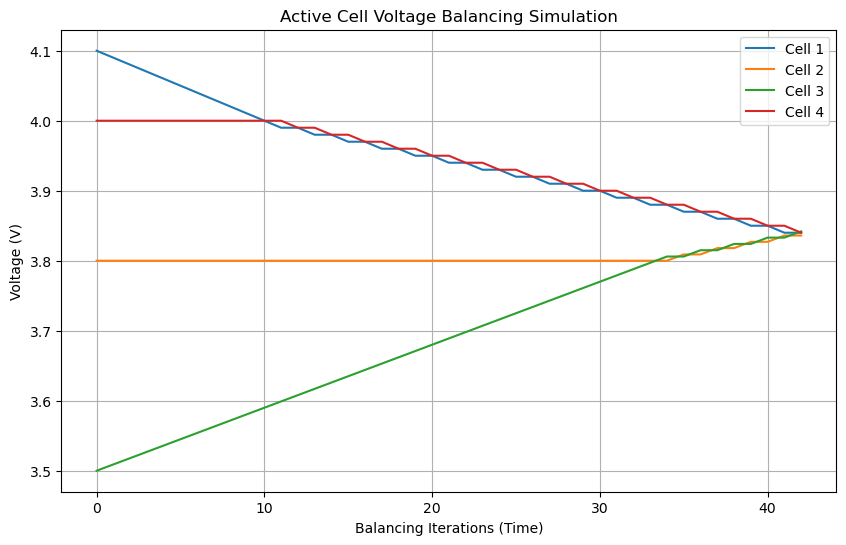

In [12]:
#plot voltage changes over time
history_array = np.array(history)

plt.figure(figsize=(10, 6))
#plot voltage changes for each cell
for i in range(4):
    plt.plot(history_array[:, i], label=f'Cell {i+1}')
plt.title('Active Cell Voltage Balancing Simulation')
plt.xlabel('Balancing Iterations (Time)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.grid(True)
plt.show()